<a href="https://colab.research.google.com/github/Imaspson/PyTorchLearning/blob/main/01_PyTorch_Workflow_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1+cu118'

# Creating *known* parameters

In [7]:
weight = 0.9
bias = 0.3

#Create data

In [8]:
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3090],
         [0.3180],
         [0.3270],
         [0.3360]]))

# Create train/test split

In [9]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

# Create visualisation function

In [22]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(x=train_data, y=train_labels, c="b", s=4, label="Training data")
  plt.scatter(x=test_data, y=test_labels, c="g", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

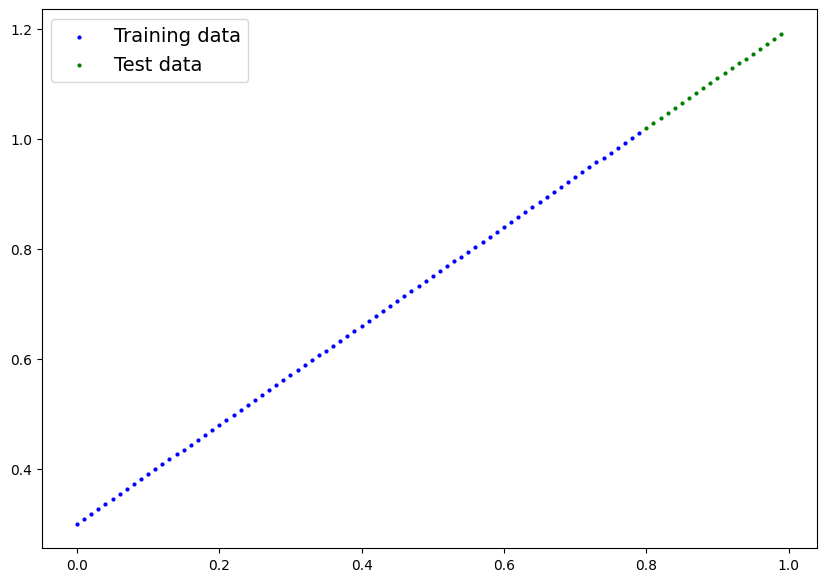

In [23]:
plot_predictions()

# Create standard LR Model

In [24]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                             requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

# Create instance of model

In [31]:
torch.manual_seed(7)

model = LinearRegressionModel()

list(model.parameters()), model.state_dict()

([Parameter containing:
  tensor([-0.1468], requires_grad=True),
  Parameter containing:
  tensor([0.7861], requires_grad=True)],
 OrderedDict([('weights', tensor([-0.1468])), ('bias', tensor([0.7861]))]))

# Making predictions

In [32]:
with torch.inference_mode():
  y_preds = model(X_test)

print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values: \n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values: 
tensor([[0.6687],
        [0.6672],
        [0.6658],
        [0.6643],
        [0.6628],
        [0.6614],
        [0.6599],
        [0.6584],
        [0.6570],
        [0.6555],
        [0.6540],
        [0.6526],
        [0.6511],
        [0.6496],
        [0.6482],
        [0.6467],
        [0.6452],
        [0.6438],
        [0.6423],
        [0.6408]])


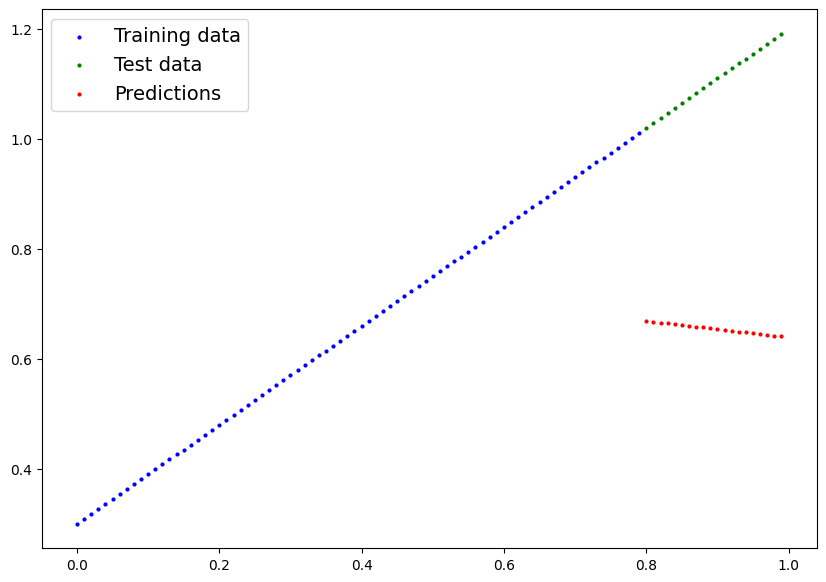

In [33]:
plot_predictions(predictions=y_preds)

# Create loss function and optimizer

In [35]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

# Create training loop and testing loop

In [39]:
torch.manual_seed(7)

epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # Training
  model.train()

  y_pred = model(X_train)

  loss = loss_function(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss_function(test_pred, y_test.type(torch.float))

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.11078634113073349 | MAE Test Loss: 0.2612193524837494
Epoch: 20 | MAE Train Loss: 0.10393514484167099 | MAE Test Loss: 0.24489176273345947
Epoch: 40 | MAE Train Loss: 0.09708297252655029 | MAE Test Loss: 0.22890815138816833
Epoch: 60 | MAE Train Loss: 0.09023177623748779 | MAE Test Loss: 0.21258051693439484
Epoch: 80 | MAE Train Loss: 0.0833805724978447 | MAE Test Loss: 0.19625288248062134
Epoch: 100 | MAE Train Loss: 0.07652847468852997 | MAE Test Loss: 0.18026955425739288
Epoch: 120 | MAE Train Loss: 0.06967736780643463 | MAE Test Loss: 0.1639423370361328
Epoch: 140 | MAE Train Loss: 0.0628262609243393 | MAE Test Loss: 0.14761514961719513
Epoch: 160 | MAE Train Loss: 0.05597417801618576 | MAE Test Loss: 0.13163192570209503
Epoch: 180 | MAE Train Loss: 0.04912307485938072 | MAE Test Loss: 0.11530473083257675
Epoch: 200 | MAE Train Loss: 0.042271971702575684 | MAE Test Loss: 0.09897753596305847
Epoch: 220 | MAE Train Loss: 0.03541988879442215 | MAE Test Los

# Plot the loss curves

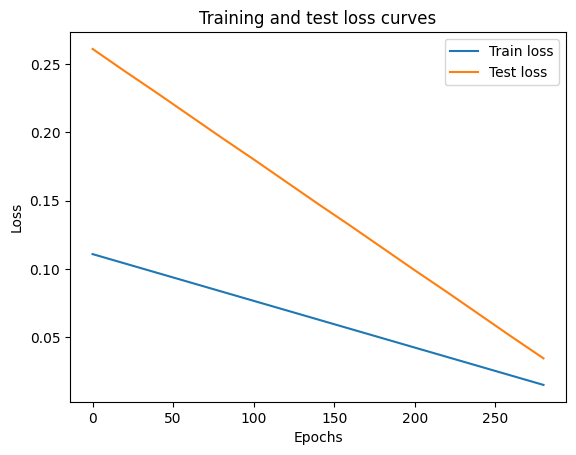

In [42]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Find the model's learned parameters

In [43]:
print(model.state_dict())

print(f"Weights: {weight} | Bias; {bias}")

OrderedDict([('weights', tensor([0.8601])), ('bias', tensor([0.3169]))])
Weights: 0.9 | Bias; 0.3


# Making predictions

In [44]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[1.0050],
        [1.0136],
        [1.0222],
        [1.0308],
        [1.0394],
        [1.0480],
        [1.0566],
        [1.0652],
        [1.0738],
        [1.0824],
        [1.0910],
        [1.0996],
        [1.1082],
        [1.1168],
        [1.1254],
        [1.1340],
        [1.1426],
        [1.1512],
        [1.1598],
        [1.1684]])

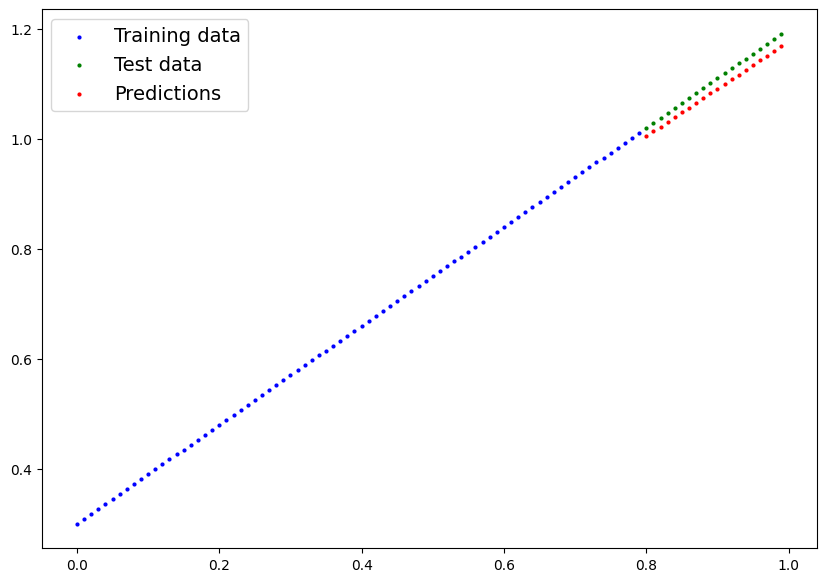

In [45]:
plot_predictions(predictions=y_preds)

# Save the model

In [47]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_hw_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_hw_model.pth


# Check the saved file path

In [48]:
!ls -l models/01_pytorch_workflow_hw_model.pth

-rw-r--r-- 1 root root 1211 Sep 23 10:33 models/01_pytorch_workflow_hw_model.pth
